# Inspirational Notebooks
### Generating new festures according to these notebooks

* https://www.kaggle.com/nuhsikander/lgbm-new-features-corrected
* https://www.kaggle.com/rteja1113/lightgbm-with-count-features
* https://www.kaggle.com/aharless/swetha-s-xgboost-revised
* https://www.kaggle.com/bk0000/non-blending-lightgbm-model-lb-0-977

# Load Data

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

import math
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import read_csv
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

import warnings
warnings.filterwarnings('ignore')

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/Users/PP/Documents/7250/Python/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/PP/Documents/7250/Python/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/PP/Documents/7250/Python/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/PP/Documents/7250/Python/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/PP/Documents/7250/Python/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta

Using TensorFlow backend.


In [3]:
# df_train= pd.read_csv('data/train.csv',nrows=200000, parse_dates=['click_time'])
df_train = pd.read_csv('data/train_new_cols.csv',nrows=200000) #train data subset, original too large
df_train.dropna()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 57 columns):
Unnamed: 0                            200000 non-null int64
ip                                    200000 non-null int64
app                                   200000 non-null int64
device                                200000 non-null int64
os                                    200000 non-null int64
channel                               200000 non-null int64
click_time                            200000 non-null object
attributed_time                       348 non-null object
is_attributed                         200000 non-null int64
day                                   200000 non-null int64
hour                                  200000 non-null int64
minute                                200000 non-null int64
second                                200000 non-null int64
ip_confRate                           200000 non-null float64
app_confRate                          200000 non

In [4]:
df_train.columns.values

array(['Unnamed: 0', 'ip', 'app', 'device', 'os', 'channel', 'click_time',
       'attributed_time', 'is_attributed', 'day', 'hour', 'minute',
       'second', 'ip_confRate', 'app_confRate', 'device_confRate',
       'os_confRate', 'channel_confRate', 'app_channel_confRate',
       'app_os_confRate', 'app_device_confRate', 'channel_os_confRate',
       'channel_device_confRate', 'os_device_confRate',
       'ip_app_channel_var_day', 'ip_app_os_var_hour',
       'ip_day_channel_var_hour_x', 'ip_day_hour_count_channel',
       'ip_app_count_channel', 'ip_app_os_count_channel',
       'ip_app_day_hour_count_channel', 'ip_app_channel_mean_hour',
       'app_AvgViewPerDistinct_ip', 'app_count_channel',
       'channel_count_app', 'ip_nunique_channel', 'ip_nunique_app',
       'ip_day_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device',
       'app_nunique_channel', 'ip_device_os_nunique_app',
       'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os',
       'ip_day_channel

In [5]:
cols = ['ip', 'app', 'device', 'os', 'channel', 'click_time',
       'attributed_time', 'is_attributed', 'ip_confRate', 'app_confRate', 'device_confRate',
       'os_confRate', 'channel_confRate', 'app_channel_confRate',
       'app_os_confRate', 'app_device_confRate', 'channel_os_confRate',
       'channel_device_confRate', 'os_device_confRate']
df_train = df_train.loc[:,cols]

In [6]:
df_train.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,ip_confRate,app_confRate,device_confRate,os_confRate,channel_confRate,app_channel_confRate,app_os_confRate,app_device_confRate,channel_os_confRate,channel_device_confRate,os_device_confRate
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,0.000000,0.000446,0.001193,0.001146,0.000497,0.000360,0.000366,0.000444,0.000000,0.000499,0.001182
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,0.000000,0.000446,0.001193,0.001394,0.000497,0.000360,0.000275,0.000444,0.000235,0.000499,0.001428
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,0.000000,0.000446,0.001193,0.001146,0.000497,0.000360,0.000366,0.000444,0.000000,0.000499,0.001182
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,0.000775,0.000431,0.001193,0.001146,0.004071,0.004164,0.000201,0.000445,0.001835,0.004109,0.001182
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,0.000000,0.000446,0.001193,0.001146,0.000497,0.000360,0.000366,0.000444,0.000000,0.000499,0.001182
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0,0.000000,0.000446,0.001193,0.000851,0.000497,0.000360,0.000559,0.000444,0.002329,0.000499,0.000882
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0,0.000000,0.000446,0.001193,0.000328,0.000497,0.000360,0.000000,0.000444,0.000000,0.000499,0.000336
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0,0.000000,0.000446,0.001193,0.001394,0.000497,0.000360,0.000275,0.000444,0.000235,0.000499,0.001428
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0,0.000000,0.000446,0.001193,0.001146,0.000497,0.000360,0.000366,0.000444,0.000000,0.000499,0.001182
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0,0.000000,0.000256,0.001193,0.001859,0.000161,0.000256,0.000000,0.000260,0.000000,0.000165,0.001944


In [7]:
df_train['is_attributed'].value_counts()

0    199652
1       348
Name: is_attributed, dtype: int64

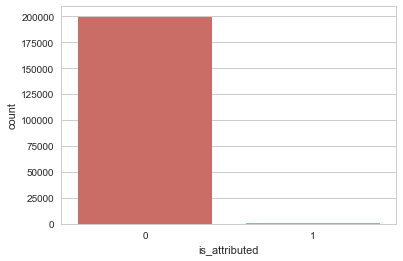

In [8]:
sns.countplot(x='is_attributed', data=df_train, palette='hls')
plt.show()

In [9]:
# The ratio of df_train to df_test is 0.8 to 0.2 or 0.75 to 0.25
df_test = pd.read_csv('data/train_new_cols.csv', nrows=50000,skiprows=range(1, 400000))
df_test.dropna()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 57 columns):
Unnamed: 0                            50000 non-null int64
ip                                    50000 non-null int64
app                                   50000 non-null int64
device                                50000 non-null int64
os                                    50000 non-null int64
channel                               50000 non-null int64
click_time                            50000 non-null object
attributed_time                       88 non-null object
is_attributed                         50000 non-null int64
day                                   50000 non-null int64
hour                                  50000 non-null int64
minute                                50000 non-null int64
second                                50000 non-null int64
ip_confRate                           50000 non-null float64
app_confRate                          50000 non-null float64
dev

In [10]:
df_test = df_test.loc[:,cols]

In [11]:
df_test.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,ip_confRate,app_confRate,device_confRate,os_confRate,channel_confRate,app_channel_confRate,app_os_confRate,app_device_confRate,channel_os_confRate,channel_device_confRate,os_device_confRate
0,115115,8,1,13,145,2017-11-06 16:07:47,NaN,0,0.000000,0.001208,0.001193,0.001146,0.001055,0.001081,0.001089,0.001234,0.000889,0.001076,0.001182
1,21633,1,1,19,178,2017-11-06 16:07:47,NaN,0,0.000000,0.000309,0.001193,0.001394,0.000147,0.000000,0.000098,0.000317,0.000216,0.000157,0.001428
2,144498,12,1,17,178,2017-11-06 16:07:47,NaN,0,0.000000,0.000134,0.001193,0.000893,0.000147,0.000157,0.000194,0.000141,0.000239,0.000157,0.000944
3,76919,2,1,6,237,2017-11-06 16:07:47,NaN,0,0.001656,0.000262,0.001193,0.001548,0.000205,0.000205,0.000223,0.000278,0.000000,0.000213,0.001592
4,1556,15,1,13,245,2017-11-06 16:07:47,NaN,0,0.000000,0.000210,0.001193,0.001146,0.000064,0.000078,0.000069,0.000220,0.000042,0.000068,0.001182
5,67467,15,1,37,245,2017-11-06 16:07:47,NaN,0,0.000000,0.000210,0.001193,0.000316,0.000064,0.000078,0.000000,0.000220,0.000000,0.000068,0.000273
6,20266,64,1,19,459,2017-11-06 16:07:47,NaN,0,0.000000,0.000256,0.001193,0.001394,0.000161,0.000256,0.000538,0.000260,0.000330,0.000165,0.001428
7,31564,15,1,19,265,2017-11-06 16:07:47,NaN,0,0.000000,0.000210,0.001193,0.001394,0.000079,0.000163,0.000254,0.000220,0.000000,0.000082,0.001428
8,1732,9,1,13,134,2017-11-06 16:07:47,NaN,0,0.000000,0.000848,0.001193,0.001146,0.000562,0.000655,0.000809,0.000888,0.000418,0.000583,0.001182
9,111114,15,1,13,245,2017-11-06 16:07:47,NaN,0,0.000000,0.000210,0.001193,0.001146,0.000064,0.000078,0.000069,0.000220,0.000042,0.000068,0.001182


In [12]:
df_test['is_attributed'].value_counts()

0    49912
1       88
Name: is_attributed, dtype: int64

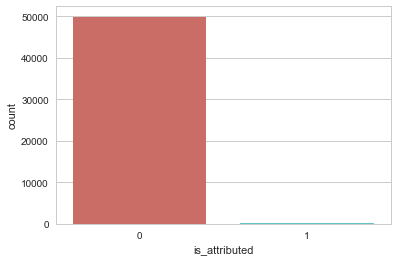

In [13]:
sns.countplot(x='is_attributed', data=df_test, palette='hls')
plt.show()

In [14]:
# Get columes names except the click_time (object), attributed_time (object) and is_attributed
train_cols = []
for each_value in df_train.columns.values:
    if each_value == 'click_time' or each_value == 'attributed_time' or each_value == 'is_attributed':
        continue
    train_cols.append(each_value)
train_cols

['ip',
 'app',
 'device',
 'os',
 'channel',
 'ip_confRate',
 'app_confRate',
 'device_confRate',
 'os_confRate',
 'channel_confRate',
 'app_channel_confRate',
 'app_os_confRate',
 'app_device_confRate',
 'channel_os_confRate',
 'channel_device_confRate',
 'os_device_confRate']

In [15]:
# Data_X
X_train = df_train.loc[:,train_cols]
X_test = df_test.loc[:,train_cols]

In [16]:
X_train.shape

(200000, 16)

In [17]:
X_test.shape

(50000, 16)

In [18]:
# Data_Y
y_train = df_train[['is_attributed']]
y_test = df_test[['is_attributed']]

In [19]:
y_train.shape

(200000, 1)

In [20]:
y_test.shape

(50000, 1)

In [21]:
y_test_val = y_test.values

# Algorithms

### 1. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
def randomForest_pre(X_train, y_train, X_test, y_test):
    y_train_model = y_train.values.ravel()
    RF_model = RandomForestClassifier()
    # Train the model
    RF_fit = RF_model.fit(X_train, y_train_model)
    # Get the prediction of the test data
    RF_predict = RF_model.predict(X_test)
    # Compare the prediction with the known values
    RF_acc = sklearn.metrics.accuracy_score(np.array(RF_predict)[:], 
                                         np.array(y_test_val)[:])
    # Plot the data
    plt.figure(figsize=(10,5))
    plt.plot(RF_predict, color='red', label='Prediction')
    plt.plot(y_test, label='Y_test')
    plt.legend(['Prediction', 'Y_test'])
    _ = plt.ylim()
    
    return RF_fit, RF_predict, RF_acc, RF_model

In [24]:
# RF_fit, RF_pre, RF_acc, rf_model = randomForest_pre(X_train, y_train, X_test, y_test)
# RF_acc

### 2. Gradient Boosting & AdaBoost

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
def gradientBoosting_pre(X_train, y_train, X_test, y_test):
    y_train_model = y_train.values.ravel()
    GB_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    # Train the model
    GB_fit = GB_model.fit(X_train, y_train_model)
    # Get the prediction of the test data
    GB_predict = GB_model.predict(X_test)
    # Compare the prediction with the known values
    GB_acc = sklearn.metrics.accuracy_score(np.array(GB_predict)[:], 
                                         np.array(y_test_val)[:])
    
    # Plot the data
    plt.figure(figsize=(10,5))
    plt.plot(GB_predict, color='red', label='Prediction')
    plt.plot(y_test, label='Y_test')
    plt.legend(['Prediction', 'Y_test'])
    _ = plt.ylim()
    
    return GB_fit, GB_predict, GB_acc, GB_model

In [27]:
# GB_fit, GB_predict, GB_acc, gb_model = gradientBoosting_pre(X_train, y_train, X_test, y_test)
# GB_acc

### 3. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
def logisticRegression_pre(X_train, y_train, X_test, y_test):
    y_train_model = y_train.values.ravel()
    LG_model = LogisticRegression()
    # Train the model
    LG_fit = LG_model.fit(X_train, y_train_model)
    # Get the prediction of the test data
    LG_predict = LG_model.predict(X_test)
    # Compare the prediction with the known values
    LG_acc = sklearn.metrics.accuracy_score(np.array(LG_predict)[:], 
                                         np.array(y_test_val)[:])
    
    return LG_fit, LG_predict, LG_acc, LG_model

In [30]:
# LG_fit, LG_predict, LG_acc, lg_model = logisticRegression_pre(X_train, y_train, X_test, y_test)
# LG_acc

### 4. SVM - Support Vector Machine

In [31]:
from sklearn import svm

In [32]:
def svm_pre(X_train, y_train, X_test, y_test):
    svm_model = svm.SVC()
    uniq = np.unique(y_train[9000:10000])
    # Train the model
    SVM_fit = svm_model.fit(X_train[9000:10000], y_train[9000:10000])
    # Get the prediction of the test data
    SVM_predict = svm_model.predict(X_test)
    # Compare the prediction with the known values
    SVM_acc = sklearn.metrics.accuracy_score(np.array(LG_predict)[:], 
                                     np.array(y_test_val)[:])
    return SVM_fit, SVM_predict, SVM_acc, svm_model

In [33]:
# svm_fit, svm_predict, svm_acc, svm_model = svm_pre(X_train, y_train, X_test, y_test)
# svm_acc

### 5. ANN - Artificial Neural Network

In [34]:
def shallow_net_A(n=55,i=len(train_cols),o=2):
    # Create simple one dense layer net
    # Default 55 neurons, input 5, output 2
    net = Sequential()
    net.add(Dense(n, activation='sigmoid', input_shape=(i,)))
    net.add(Dense(2, activation='softmax'))
    # Compile net
    net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return net

In [35]:
def ann_pre(X_train, df_train, X_test, df_test):
    ann_model = shallow_net_A()
    ann_summary = ann_model.summary()
    # Convert the values
    X_train_ann = X_train.values
    y_train_ann = df_train['is_attributed'].values
    X_test_ann = X_test.values
    y_test_ann = df_test['is_attributed'].values
    # Conver the matrix, finally we have two classes (n_classes), the original one has oly one class
    n_classes = 2
    y_train_ann = keras.utils.to_categorical(y_train_ann, n_classes)
    y_test_ann = keras.utils.to_categorical(y_test_ann, n_classes)
    # Training the model
    ann_fit = ann_model.fit(X_train_ann, y_train_ann, batch_size=128, epochs=99, verbose=1, validation_data=(X_test_ann, y_test_ann))
    
    # Evaluate: loss & accuracy -> Using Evaluation to get the accracy
    ann_evaluate = ann_model.evaluate(X_test_ann, y_test_ann)
    
    # Using prediction
    ann_pre = ann_model.predict(X_test)
    # Convert value to boolean value
    y_pre = (ann_pre > 0.5)
    # Counting the boolean value, counting the accuracy by using basic calculation
    from sklearn.metrics import confusion_matrix
    ann_output = confusion_matrix(y_test_ann.argmax(axis=1), y_pre.argmax(axis=1))
    ann_prediction_acc = ann_output[0][0]/(ann_output[0][0]+ann_output[1][0])
    
    return ann_summary, ann_fit, ann_evaluate, ann_prediction_acc, ann_model

In [36]:
# ann_summary, ann_fit, ann_evaluate, ann_prediction_acc, ann_model = ann_pre(X_train, df_train, X_test, df_test)

In [37]:
# ann_prediction_acc

### 6. MLP - Multi-layered Neural Network

In [38]:
def shallow_net_C(n=55,i=len(train_cols),o=2):
    # Create simple one dense layer net
    # Default 55 neurons, input 5, output 2, here we have more hidden layers with different activation
    net = Sequential()
    net.add(Dense(n, activation='sigmoid', input_shape=(i,)))
    net.add(Dense(n, activation='relu', input_shape=(i,)))
    net.add(Dense(n, activation='tanh', input_shape=(i,)))
    net.add(Dense(n, activation='elu', input_shape=(i,)))
    net.add(Dense(2, activation='softmax'))
    # Compile net
    net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return net

In [39]:
def mlp_pre(X_train, df_train, X_test, df_test):
    mlp_model = shallow_net_C()
    mlp_summary = mlp_model.summary()
    # Convert the values
    X_train_mlp = X_train.values
    y_train_mlp = df_train['is_attributed'].values
    X_test_mlp = X_test.values
    y_test_mlp = df_test['is_attributed'].values
    # Conver the matrix, finally we have two classes (n_classes)
    n_classes = 2
    y_train_mlp = keras.utils.to_categorical(y_train_mlp, n_classes)
    y_test_mlp = keras.utils.to_categorical(y_test_mlp, n_classes)
    # Training the model
    mlp_fit = mlp_model.fit(X_train_mlp, y_train_mlp, batch_size=128, epochs=99, verbose=1, validation_data=(X_test_mlp, y_test_mlp))
    
    # Evaluate: loss & accuracy -> Using Evaluation to get the accracy
    mlp_evaluate = mlp_model.evaluate(X_test_mlp, y_test_mlp)
    
    # Using prediction
    mlp_pre = mlp_model.predict(X_test)
    # Convert value to boolean value
    y_pre = (mlp_pre > 0.5)
    # Counting the boolean value, counting the accuracy by using basic calculation
    from sklearn.metrics import confusion_matrix
    mlp_output = confusion_matrix(y_test_mlp.argmax(axis=1), y_pre.argmax(axis=1))
    mlp_prediction_acc = mlp_output[0][0]/(mlp_output[0][0]+mlp_output[1][0])
    
    return mlp_summary, mlp_fit, mlp_evaluate, mlp_prediction_acc, mlp_model

In [40]:
# mlp_summary, mlp_fit, mlp_evaluate, mlp_prediction_acc, mlp_model = mlp_pre(X_train, df_train, X_test, df_test)

In [41]:
# mlp_prediction_acc

### 7. RNN - Recurrent Neural Network (LSTM)

In [42]:
from keras.layers import LSTM

In [43]:
def rnn_pre(df_train, train_rate=0.75):
    # Set the dataset for train and test
    df_rnn_train = df_train.loc[:,train_cols + ['is_attributed']]
    df_rnn_test = df_test.loc[:,train_cols + ['is_attributed']]
    df_rnn = df_rnn_train.append(df_rnn_test)
    
    pre_col_index = list(df_rnn_train).index('is_attributed')
    dataset = df_rnn.values.astype('float32')
    
    # Normalize the dataset, set all the data of the dataset to be in the range between 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # Split into train and test sets
    train_size = int(len(dataset) * train_rate)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
    # Use this function to prepare the train and test datasets for modeling
    look_back = 1
    trainY = train[:, pre_col_index]
    trainX = np.delete(train, pre_col_index, axis = 1) 
    testY = test[:, pre_col_index]
    testX = np.delete(test, pre_col_index, axis = 1) 
    
    # Reshape input to be [samples, time steps, features], here it changes the dimension from 2D to 3D
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # Create and fit the LSTM network
    RNN_model = Sequential()
    RNN_model.add(LSTM(5, input_shape=(1, len(trainX[0][0]))))
    RNN_model.add(Dense(1))
    RNN_model.compile(loss='mean_squared_error', optimizer='adam')
    RNN_model.fit(trainX, trainY, epochs=10, batch_size=128, verbose=2)
    
    # Make predictions, trainPredict should be 1D array
    trainPredict = RNN_model.predict(trainX)
    testPredict = RNN_model.predict(testX)
    
    # Change the dimension from 3D to 2D
    trainX_2D = trainX.transpose([1,0,2]).reshape(len(trainX),len(trainX[0][0]))
    testX_2D = testX.transpose([1,0,2]).reshape(len(testX),len(testX[0][0]))
    
    # Append prediction back to the model
    trainPredict_6cols = np.append(trainX_2D, trainPredict, 1)
    testPredict_6cols = np.append(testX_2D, testPredict, 1)

    # Invert predictions back to normal values
    trainPredict_6cols = scaler.inverse_transform(trainPredict_6cols)
    testPredict_6cols = scaler.inverse_transform(testPredict_6cols)
    
    # Calculating the RMSE
    trainScore = math.sqrt(mean_squared_error(trainY, trainPredict_6cols[:, pre_col_index]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY, testPredict_6cols[:, pre_col_index]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    final_prediction_train = np.where(trainPredict_6cols[:, pre_col_index] > 0, 1, 0)
    final_prediction_test = np.where(testPredict_6cols[:, pre_col_index] > 0, 1, 0)
    
    # Change dimension from 2D to 1D
    final_prediction_train = np.reshape(final_prediction_train, (-1, 1))
    final_prediction_test = np.reshape(final_prediction_test, (-1, 1))
    
    # Counting the accuracy by using basic calculation
    rnn_acc_train = sklearn.metrics.accuracy_score(np.array(final_prediction_train)[:], 
                                     np.array(trainY)[:])
    rnn_acc_test = sklearn.metrics.accuracy_score(np.array(final_prediction_test)[:], 
                                     np.array(testY)[:])
    return rnn_acc_train

In [44]:
# rnn_acc = rnn_pre(df_train)
# rnn_acc

# Train & Test Data (Call the function)

#### 1. Random Forest

Random Forest accuracy: 99.85199999999999%


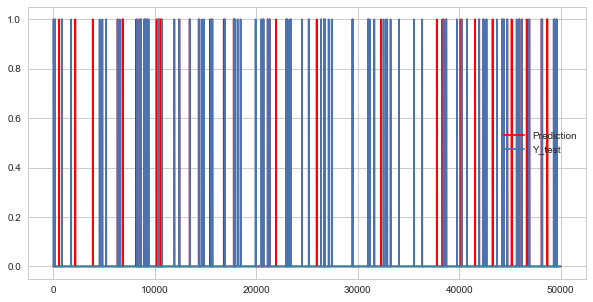

In [24]:
RF_fit, RF_pre, RF_acc, rf_model = randomForest_pre(X_train, y_train, X_test, y_test)
print('Random Forest accuracy: {}%'.format(RF_acc * 100))

#### 2. Gradient Boosting

Gradient Boosting accuracy: 99.634%


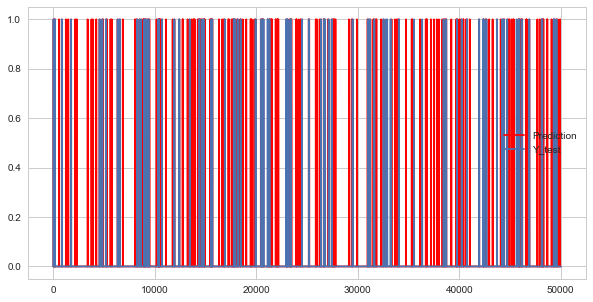

In [46]:
GB_fit, GB_predict, GB_acc, gb_model = gradientBoosting_pre(X_train, y_train, X_test, y_test)
print('Gradient Boosting accuracy: {}%'.format(GB_acc * 100))

#### 3. Logistic Regression

In [47]:
LG_fit, LG_predict, LG_acc, lg_model = logisticRegression_pre(X_train, y_train, X_test, y_test)
print('Logistic Regression accuracy: {}%'.format(LG_acc * 100))

Logistic Regression accuracy: 99.824%


#### 4. SVM - Support Vector Machine

In [48]:
svm_fit, svm_predict, svm_acc, svm_model = svm_pre(X_train, y_train, X_test, y_test)
print('SVM accuracy: {}%'.format(svm_acc * 100))

SVM accuracy: 99.824%


#### 5. ANN - Artificial Neural Network

In [49]:
ann_summary, ann_fit, ann_evaluate, ann_prediction_acc, ann_model = ann_pre(X_train, df_train, X_test, df_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 55)                935       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 112       
Total params: 1,047
Trainable params: 1,047
Non-trainable params: 0
_________________________________________________________________
Train on 200000 samples, validate on 50000 samples
Epoch 1/99
200000/200000 [==============================] - 2s 11us/step - loss: 0.0058 - acc: 0.9938 - val_loss: 0.0020 - val_acc: 0.9982
Epoch 2/99
200000/200000 [==============================] - 2s 12us/step - loss: 0.0019 - acc: 0.9983 - val_loss: 0.0019 - val_acc: 0.9982
Epoch 3/99
200000/200000 [==============================] - 2s 12us/step - loss: 0.0018 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9982
Epoch 4/99
200000/200000 [==============================] - 2s 8us/s

In [50]:
print('ANN accuracy: {}%'.format(ann_prediction_acc * 100))

ANN accuracy: 99.824%


#### 6. MLP - Multi-layered Neural Network

In [51]:
mlp_summary, mlp_fit, mlp_evaluate, mlp_prediction_acc, mlp_model = mlp_pre(X_train, df_train, X_test, df_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 55)                935       
_________________________________________________________________
dense_4 (Dense)              (None, 55)                3080      
_________________________________________________________________
dense_5 (Dense)              (None, 55)                3080      
_________________________________________________________________
dense_6 (Dense)              (None, 55)                3080      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 112       
Total params: 10,287
Trainable params: 10,287
Non-trainable params: 0
_________________________________________________________________
Train on 200000 samples, validate on 50000 samples
Epoch 1/99
200000/200000 [==============================] - 3s 17us/step - loss: 0.0040

In [52]:
print('MLP accuracy: {}%'.format(mlp_prediction_acc * 100))

MLP accuracy: 99.824%


#### 7. RNN - Recurrent Neural Network

In [53]:
rnn_acc = rnn_pre(df_train)
print('RNN accuracy: {}%'.format(rnn_acc * 100))

Epoch 1/10
 - 4s - loss: 0.0013
Epoch 2/10
 - 3s - loss: 0.0013
Epoch 3/10
 - 3s - loss: 0.0012
Epoch 4/10
 - 3s - loss: 0.0012
Epoch 5/10
 - 3s - loss: 0.0012
Epoch 6/10
 - 3s - loss: 0.0012
Epoch 7/10
 - 3s - loss: 0.0012
Epoch 8/10
 - 3s - loss: 0.0012
Epoch 9/10
 - 3s - loss: 0.0012
Epoch 10/10
 - 3s - loss: 0.0012
Train Score: 0.03 RMSE
Test Score: 0.03 RMSE
RNN accuracy: 41.82026666666667%


### Conclusion

In [54]:
print('Random Forest accuracy: {}%'.format(RF_acc * 100))
print('Gradient Boosting accuracy: {}%'.format(GB_acc * 100))
print('Logistic Regression accuracy: {}%'.format(LG_acc * 100))
print('SVM accuracy: {}%'.format(svm_acc * 100))
print('ANN accuracy: {}%'.format(ann_prediction_acc * 100))
print('MLP accuracy: {}%'.format(mlp_prediction_acc * 100))
print('RNN accuracy: {}%'.format(rnn_acc * 100))

Random Forest accuracy: 99.864%
Gradient Boosting accuracy: 99.634%
Logistic Regression accuracy: 99.824%
SVM accuracy: 99.824%
ANN accuracy: 99.824%
MLP accuracy: 99.824%
RNN accuracy: 41.82026666666667%


Random Forest is the best one for our project

# Prediction for test.csv

In [35]:
# Columns for our current analsis
train_cols

['ip',
 'app',
 'device',
 'os',
 'channel',
 'ip_confRate',
 'app_confRate',
 'device_confRate',
 'os_confRate',
 'channel_confRate',
 'app_channel_confRate',
 'app_os_confRate',
 'app_device_confRate',
 'channel_os_confRate',
 'channel_device_confRate',
 'os_device_confRate']

In [36]:
# Read the test data
df = pd.read_csv('data/test_small_all_features.csv')[train_cols].astype('float64')
df = np.nan_to_num(df)

In [37]:
# Read the output of the test data
sample_out = pd.read_csv('data/sample_submission.csv', nrows=1000000)[['is_attributed']].astype('float64')

In [38]:
df_predict = rf_model.predict(df)
# Compare the prediction with the known values
df_acc = sklearn.metrics.accuracy_score(np.array(df_predict)[:], 
                                         np.array(sample_out)[:])

In [39]:
print('By using the best algorittm, the accuracy of the prediction: {}%'.format(df_acc * 100))

By using the best algorittm, the accuracy of the prediction: 100.0%


The code in the document is licensed under the MIT License: https://opensource.org/licenses/MIT

All writing in the document is licensed bt The Creative Commons Attribution 3.0 https://creativecommons.org/licenses/by/3.0/us/.